# Multiple Linear Regression

In [1]:
# Use the same dataset or load another dataset with at least 4 numeric features. 
# ● Predict the target variable using multiple independent variables. 
# ● Evaluate the model using: 
#     ○ R-squared 
#     ○ Mean Squared Error (MSE) 
#     ○ Root Mean Squared Error (RMSE) 
# ● Display the coefficients of each feature.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.datasets import fetch_california_housing

In [30]:
data = fetch_california_housing()
x = data.data
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [31]:
# selected first 4 features as seems useful
x2 = x[ : , [0,1,2,3]]
y = data.target
print(x2)
print(y)

[[ 8.3252     41.          6.98412698  1.02380952]
 [ 8.3014     21.          6.23813708  0.97188049]
 [ 7.2574     52.          8.28813559  1.07344633]
 ...
 [ 1.7        17.          5.20554273  1.12009238]
 [ 1.8672     18.          5.32951289  1.17191977]
 [ 2.3886     16.          5.25471698  1.16226415]]
[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [32]:
# train and test the model
x_train,x_test,y_train,y_test = train_test_split(x2,y,test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(y_pred)
print(y_test)
# results are better than previous one 1st value is 1.9 something in 1st feature which got improved to 1.01

[1.01104548 1.55515054 2.6560014  ... 4.35939231 1.49964558 1.96082735]
[0.477   0.458   5.00001 ... 5.00001 0.723   1.515  ]


In [33]:
model.score(x_test,y_test)
# model score has also improved

0.5088800081000431

In [34]:
#     ○ R-squared 
#     ○ Mean Squared Error (MSE) 
#     ○ Root Mean Squared Error (RMSE) 

r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print("R-squared : ",r2)
print("Mean Squared Error (MSE) : ",mse)
print("Root Mean Squared Error (RMSE) : ",rmse)

R-squared :  0.5088800081000431
Mean Squared Error (MSE) :  0.6435680467793014
Root Mean Squared Error (RMSE) :  0.8022269297270576


In [69]:
print("Coefficient display of used features")
feature_names = data.feature_names
for name, coef in zip(feature_names, model.coef_):
    print(f"{name}: {coef}")

Coefficient display of used features
MedInc: 0.5452676599092809
HouseAge: 0.01606270223363848
AveRooms: -0.22461979699680173
AveBedrms: 1.112987932635253


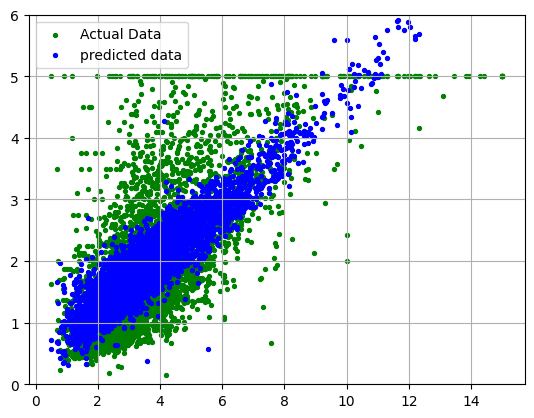

In [70]:
# if plotted according to MedInc
plt.scatter(x_test[:,0],y_test,color='green',s=8,label='Actual Data')
plt.scatter(x_test[:,0],y_pred,color='blue',s=8 , label='predicted data')
plt.ylim(0,6)
plt.grid()
plt.legend()

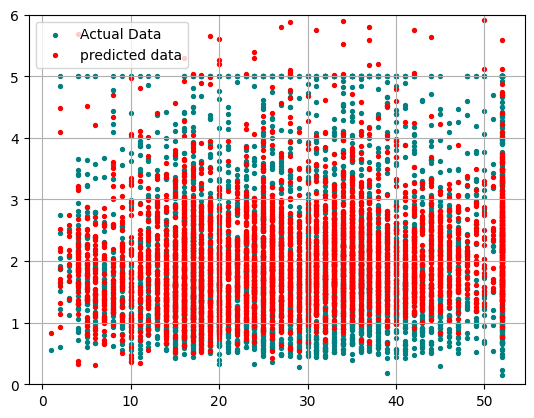

In [71]:
# if plotted according to house age
plt.scatter(x_test[:,1],y_test,color='teal',s=8,label='Actual Data')
plt.scatter(x_test[:,1],y_pred,color='red',s=8 , label='predicted data')
plt.ylim(0,6)
plt.grid()
plt.legend()